In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv('../data/clean_dataset.csv', index_col=0)

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Feature presentation

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines. 

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature. 

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities. 

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 

11) Price: Target variable stores information of the ticket price.

In [3]:
df.shape

(300153, 11)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  str    
 1   flight            300153 non-null  str    
 2   source_city       300153 non-null  str    
 3   departure_time    300153 non-null  str    
 4   stops             300153 non-null  str    
 5   arrival_time      300153 non-null  str    
 6   destination_city  300153 non-null  str    
 7   class             300153 non-null  str    
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), str(8)
memory usage: 25.2 MB


In [5]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
#sns.pairplot(df)

### analysing column : airline ###


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

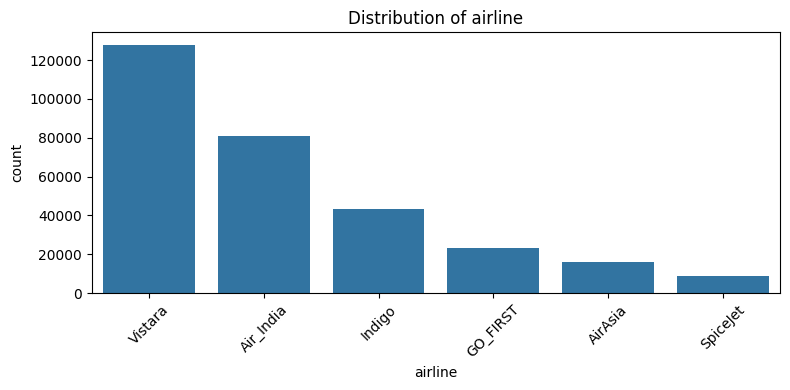

### analysing column : flight ###


flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-6474       1
G8-405        1
6E-543        1
SG-1058       1
6E-3211       1
Name: count, Length: 1561, dtype: int64

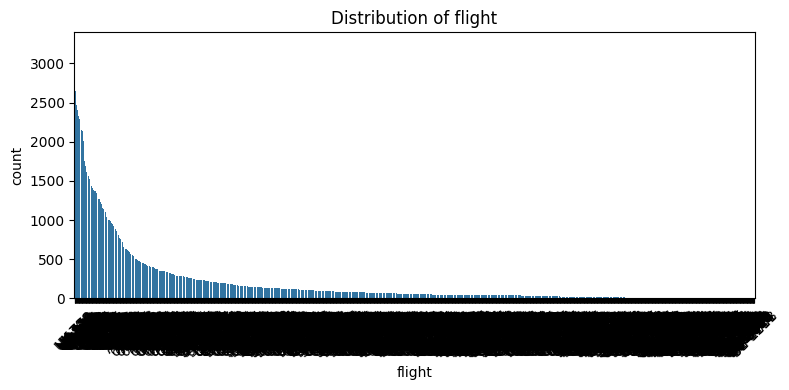

### analysing column : source_city ###


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

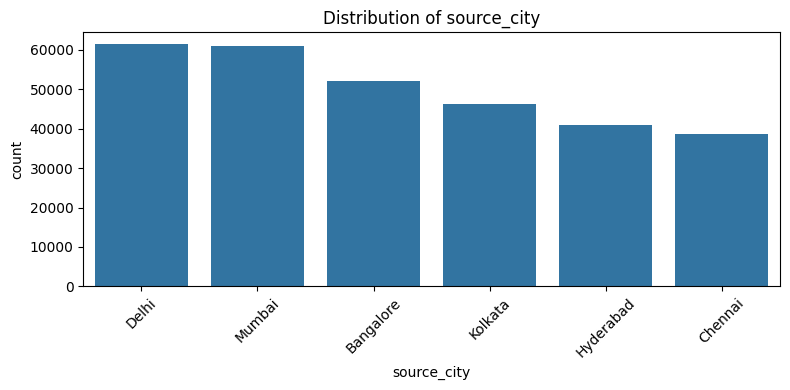

### analysing column : departure_time ###


departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

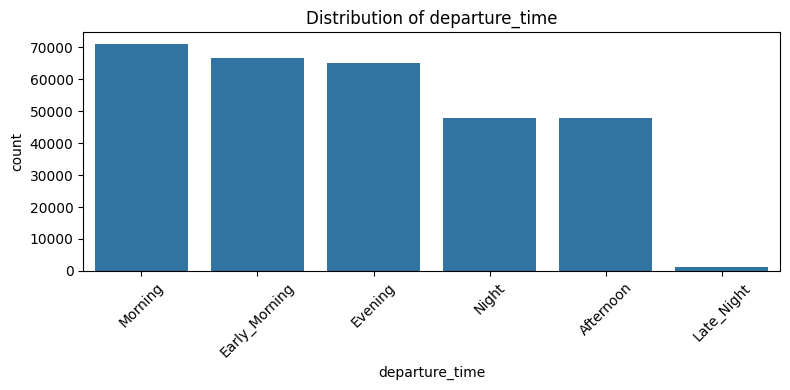

### analysing column : stops ###


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

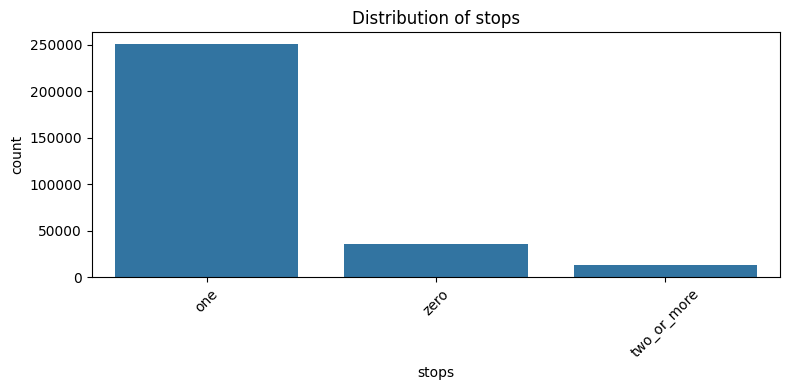

### analysing column : arrival_time ###


arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

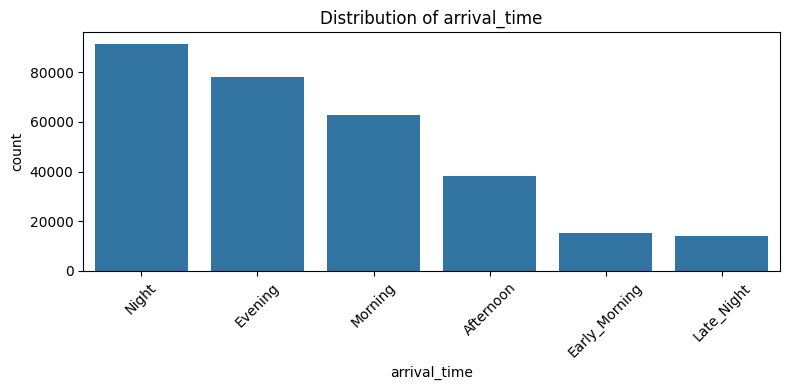

### analysing column : destination_city ###


destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

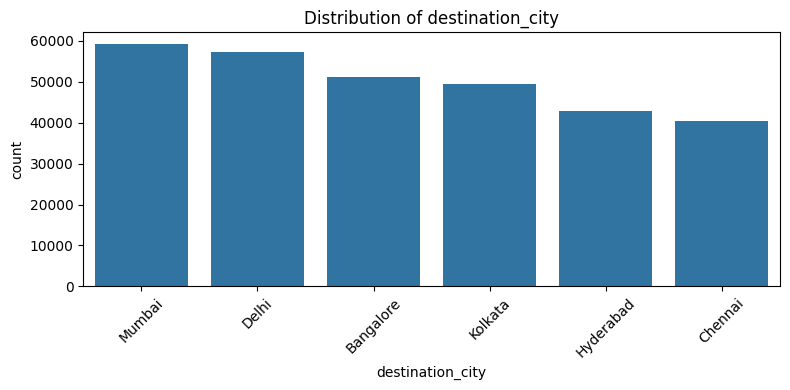

### analysing column : class ###


class
Economy     206666
Business     93487
Name: count, dtype: int64

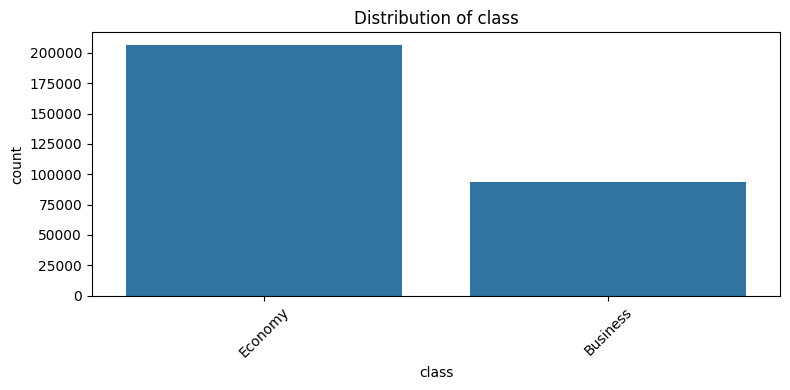

In [18]:
continuous_col = ['duration', 'days_left', 'price']
discrete_col   = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

def univariate_discrete_analysis(df, discrete_col):
    for col in discrete_col:
        print(f'### analysing column : {col} ###')
        count = df[col].value_counts()
        display(count)

        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=count.index)

        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def univariate_continuous_analysis(df, continuous_col):
    for col in continuous_col:
        print(f'### analysing column : {col} ###')
        stats = df[col].describe()
        variance = df[col].var()

        display(stats)
        print(f'Variance: {variance:.2f}')

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        #histogram
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        
        #boxplot
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()


    
univariate_discrete_analysis(df=df, discrete_col=discrete_col)


### analysing column : duration ###


count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

Variance: 51.72


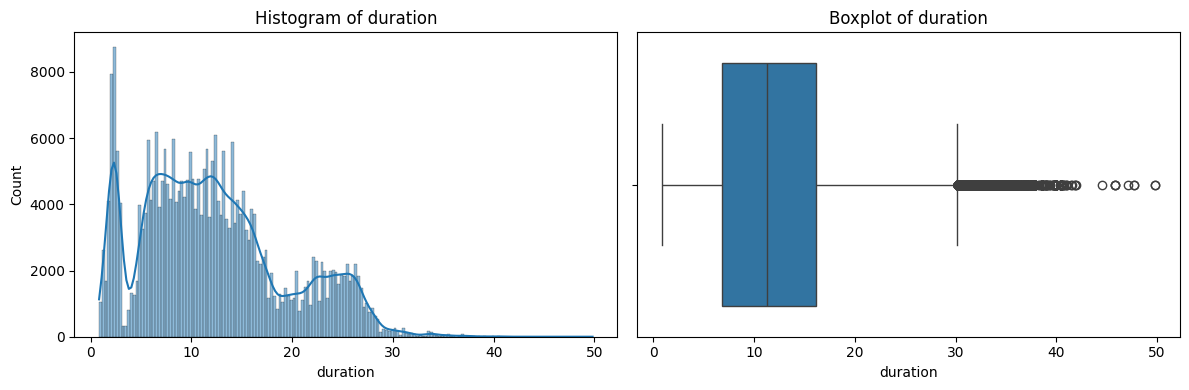

### analysing column : days_left ###


count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

Variance: 183.90


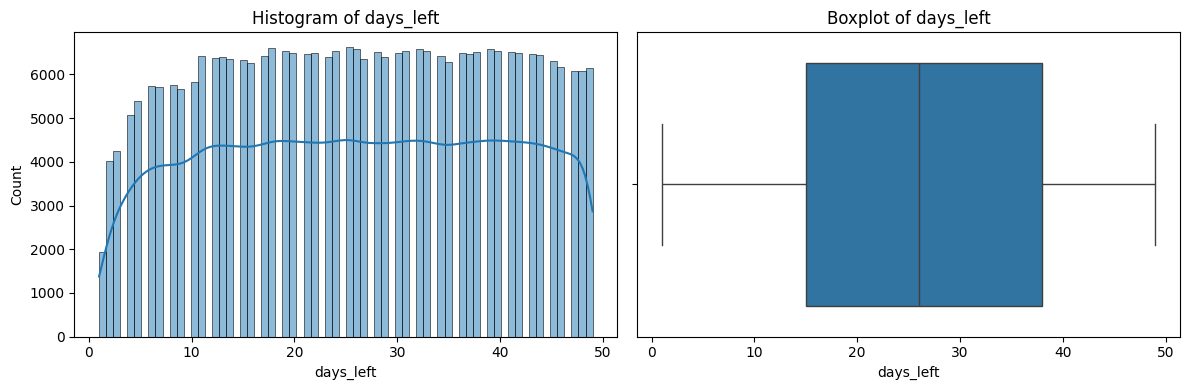

### analysing column : price ###


count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

Variance: 515188643.40


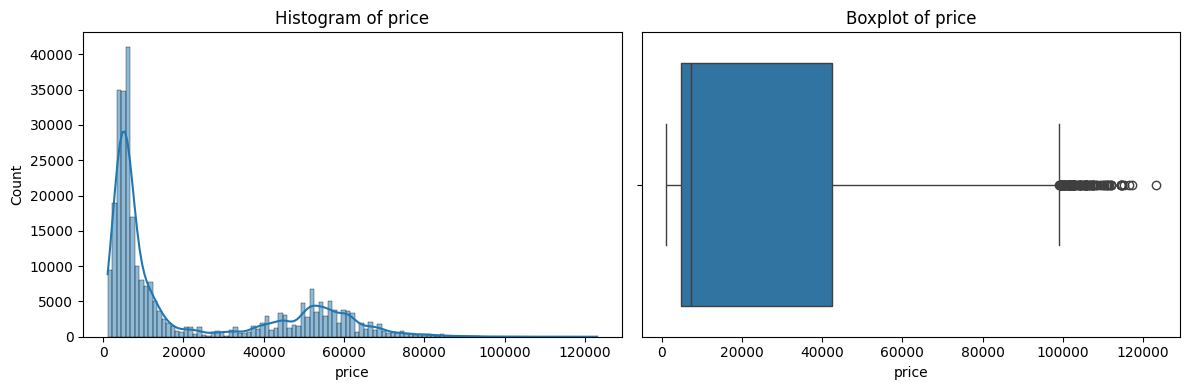

In [13]:
univariate_continuous_analysis(df=df, continuous_col=continuous_col)

### Multivariate analysis

Need to do 3 levels of multivariate analysis :
- continuous  ↔ continuous
- discrete    ↔ continuous
- discrete    ↔ discrete


for continuous columns, need to check both Pearson (linear relations) & Spearman (monotone relations) 

Pearson correlations


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


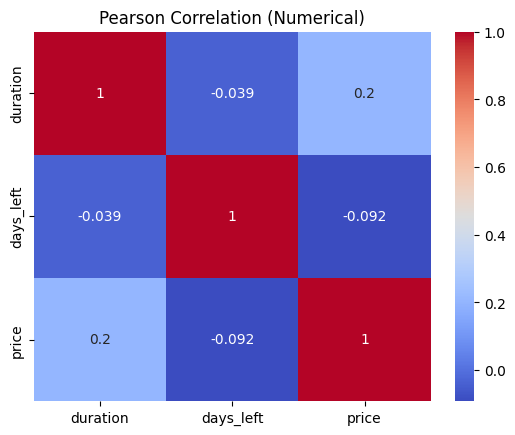

Spearman correlations


,duration,days_left,price
duration,1.000000,-0.033094,0.318841
days_left,-0.033094,1.000000,-0.267019
price,0.318841,-0.267019,1.000000


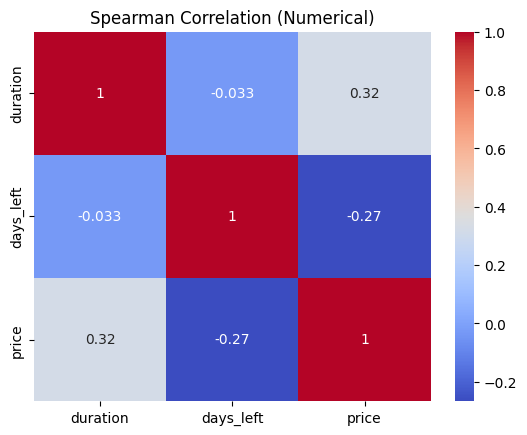

In [23]:
corr_pearson  = df[continuous_col].corr(method='pearson')
corr_spearman = df[continuous_col].corr(method='spearman')

print('Pearson correlations')
display(corr_pearson)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation (Numerical)')
plt.show()

print('Spearman correlations')
display(corr_spearman)

sns.heatmap(corr_spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation (Numerical)')
plt.show()


Let's check the relation between each variable and the final flight price

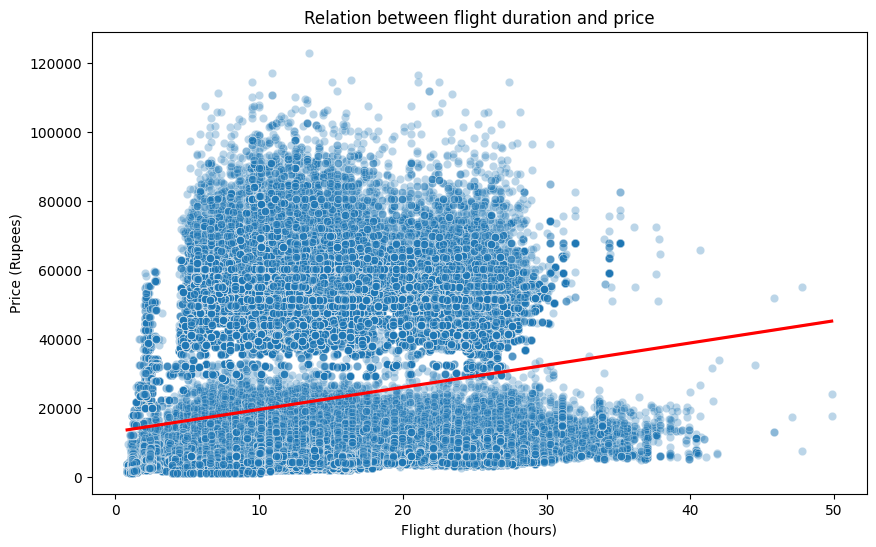

In [36]:
#relation between flight duration & price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="duration", y="price", alpha=0.3)
sns.regplot(
    data=df,
    x="duration",
    y="price",
    scatter=False,
    color="red"
)
plt.title("Relation between flight duration and price")
plt.xlabel("Flight duration (hours)")
plt.ylabel("Price (Rupees)")
plt.show()


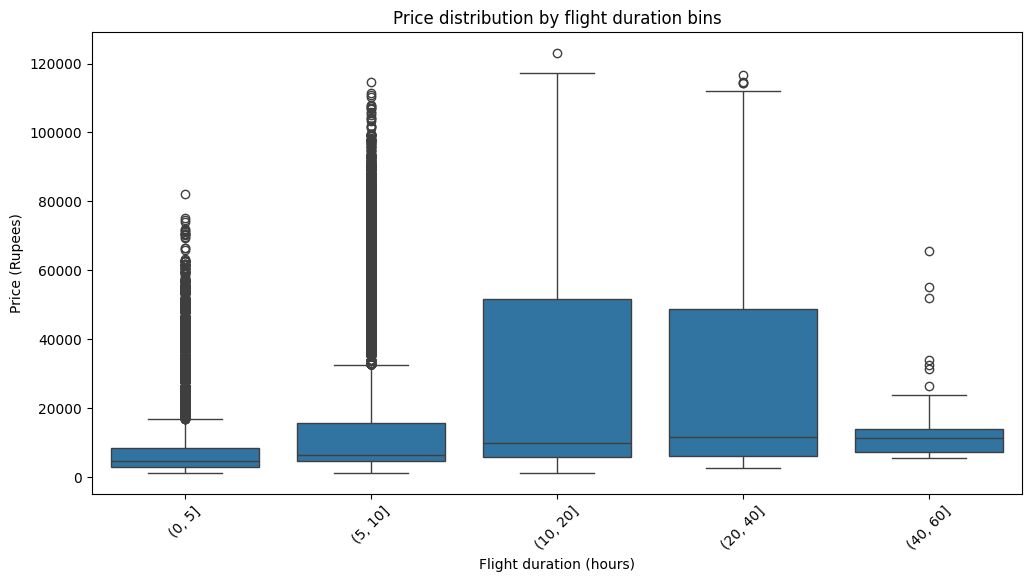

In [37]:
df["duration_bin"] = pd.cut(
    df["duration"],
    bins=[0, 5, 10, 20, 40, 60]
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x="duration_bin",
    y="price"
)
plt.title("Price distribution by flight duration bins")
plt.xlabel("Flight duration (hours)")
plt.ylabel("Price (Rupees)")
plt.xticks(rotation=45)
plt.show()
